In [230]:
%matplotlib inline
import json
import matplotlib
import numpy
import fnmatch
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.ticker import MaxNLocator
matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 8
# matplotlib.rcParams['figure.figsize']= [3.125, 1.93]  # Golden ratio
# matplotlib.rcParams['figure.figsize']= [3.125, 1.56]  # Golden ratio
# figure.figsize: 3.125, 1.56  # Squash for more space
# matplotlib.rcParams['legend.fontsize']= 6
# matplotlib.rcParams['legend.fancybox']= True
# matplotlib.rcParams['axes.linewidth']= 0.5

# matplotlib.rcParams['patch.linewidth']= 0.5
# matplotlib.rcParams['lines.linewidth']= 2
# matplotlib.rcParams['grid.linewidth']= 0.1
# matplotlib.rcParams['xtick.major.width']= 0.25
# matplotlib.rcParams['xtick.minor.width']= 0.25
# matplotlib.rcParams['ytick.major.width']= 0.25
# matplotlib.rcParams['ytick.minor.width']= 0.25
# matplotlib.rcParams['legend.numpoints']= 1

import pickle
color_n=['k','c','b','r','m','k','g']
markers=['o','*','^','s','d','3','d','o','*','^','1','4']
linestyles=[ '-',':','--','-.','--',':','-','-.', '--',':']

In [231]:
data = {1: {0: {2: 572040.0, 3: 77.0, 4: 479.0, 6: 77.0},
               1: {2: 47937.0, 3: 4.0, 4: 77.0, 6: 4.0},
               2: {2: 56695698.0, 3: 1318314.0, 4: 7323.0, 6: 2139.0},
               3: {2: 56695698.0, 3: 1235586.0, 4: 348.0, 6: 107.0},
               4: {2: 7972178.0, 3: 133.0, 4: 1537.0, 6: 133.0}},
           2: {0: {2: 619977.0, 3: 81.0, 4: 556.0, 6: 81.0},
               1: {2: 57267738.0, 3: 1318391.0, 4: 7802.0, 6: 2216.0},
               2: {2: 57267738.0, 3: 1235663.0, 4: 827.0, 6: 185.0},
               3: {2: 8544218.0, 3: 210.0, 4: 2016.0, 6: 210.0},
               4: {2: 56743635.0, 3: 1318318.0, 4: 7400.0, 6: 2143.0},
               5: {2: 56743635.0, 3: 1235590.0, 4: 425.0, 6: 112.0},
               6: {2: 8020115.0, 3: 137.0, 4: 1614.0, 6: 137.0},
               7: {2: 113391396.0, 3: 2553900.0, 4: 7671.0, 6: 2246.0},
               8: {2: 64667876.0, 3: 1318447.0, 4: 8860.0, 6: 2272.0},
               9: {2: 64667876.0, 3: 1235719.0, 4: 1885.0, 6: 240.0}},
           3: {0: {2: 57315675.0, 3: 1318395.0, 4: 7879.0, 6: 2220.0},
               1: {2: 57315675.0, 3: 1235667.0, 4: 904.0, 6: 188.0},
               2: {2: 8592155.0, 3: 214.0, 4: 2093.0, 6: 214.0},
               3: {2: 113963436.0, 3: 2553977.0, 4: 8150.0, 6: 2323.0},
               4: {2: 65239916.0, 3: 1318524.0, 4: 9339.0, 6: 2349.0},
               5: {2: 65239916.0, 3: 1235796.0, 4: 2364.0, 6: 318.0},
               6: {2: 113439333.0, 3: 2553904.0, 4: 7748.0, 6: 2250.0},
               7: {2: 64715813.0, 3: 1318451.0, 4: 8937.0, 6: 2276.0},
               8: {2: 121363574.0, 3: 2554033.0, 4: 9208.0, 6: 2380.0}},
           4: {0: {2: 114011373.0, 3: 2553981.0, 4: 314220.0, 6: 2327.0},
               1: {2: 65287853.0, 3: 1318528.0, 4: 12575.0, 6: 2353.0},
               2: {2: 65287853.0, 3: 1235800.0, 4: 5600.0, 6: 322.0},
               3: {2: 121935614.0, 3: 2554110.0, 4: 1290998.0, 6: 2470.0},
               4: {2: 121411511.0, 3: 2554037.0, 4: 149950.0, 6: 2383.0}},
           5: {0: {2: 121983551.0, 3: 2554114.0, 4: 1274557.0, 6: 2610.0}}
           }

In [232]:
def draw_plots(data, modes):
    f, (ax) = plt.subplots(1)
    for mode in modes:
        x = range(1, 1+len(data[mode]))
        y = data[mode]
        print x, y
        plt.plot(x, y, marker = markers[mode], 
                 linestyle = linestyles[mode], 
                 label=modes[mode],
                )
   
    plt.xlabel('Queries')
    plt.ylabel('Tuples')
    #ax.set_xlim(0, 1.01)
    ax.grid(True)
    pl.locator_params(nticks=5)
    ax.locator_params(nbins=5)
    ax.set_xlim(xmax=5.25)
    ax.set_xlim(xmin=0.75)
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=4, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/key_result.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

{1: [62874535, 125749070, 188623605, 251498140, 314372675], 2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 3: [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0], 6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]}
[1, 2, 3, 4, 5] [62874535, 125749070, 188623605, 251498140, 314372675]
[1, 2, 3, 4, 5] [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0]
[1, 2, 3, 4, 5] [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0]
[1, 2, 3, 4, 5] [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]


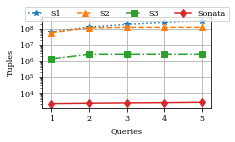

In [233]:
modes = {1: "S1", 2:"S2", 3: "S3", 6: "Sonata"}

def get_plot_data(data_in):
    n_queries = data_in.keys()
    n_queries.sort()
    out = {}
    for mode in modes:
        out[mode] = []
        
        if mode == 1:
            out[mode] = [62874535*x for x in n_queries]
        else:
            for n in n_queries:
                tmp = max([data_in[n][x][mode] for x in data_in[n].keys()])
                out[mode].append(tmp)
            
    return out

plot_data = get_plot_data(data)
print plot_data
# plot_data = {1: [62874535, 125749070, 188623605, 251498140, 314372675], 
#              2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 
#              3: [56695698.0, 57267738.0, 113963436.0, 113963440.0, 114238009.0], 
#              6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]
#             }
draw_plots(plot_data, modes)


Refinement Level Analysis

{3: [0.9251517616872145, 0.5337004818824708, 0.2797004401610447, 0.09489538352420886, 0.054592485971170494, 0.024281869954315038, 0.023656048563739908], 5: [1.0, 0.999178879498053, 0.9630456617713746, 0.793235423259098, 0.5624583897000439, 0.4441287943928303, 0.29441200282956215]}
[1, 2, 3, 4, 5, 6, 7] [0.9251517616872145, 0.5337004818824708, 0.2797004401610447, 0.09489538352420886, 0.054592485971170494, 0.024281869954315038, 0.023656048563739908]
[1, 2, 3, 4, 5, 6, 7] [1.0, 0.999178879498053, 0.9630456617713746, 0.793235423259098, 0.5624583897000439, 0.4441287943928303, 0.29441200282956215]


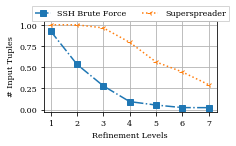

In [234]:
line_ids_2_labels = {1: "A1", 2:"A2", 3: "SSH Brute Force", 4: "A4", 5:"Superspreader", 6: "A6", 7: "A7"}

data = {1: {4: 1.0, 8: 0.9974497903614583, 12: 0.9686547108880681, 16: 0.9094857497297917, 20: 0.8368696320175808, 24: 0.7701348626040058, 28: 0.6350089127823013}, 
        2: {4: 0.9852580239144115, 8: 0.9201664219285365, 12: 0.8628837144255647, 16: 0.7959897909237116, 20: 0.4712957135864625, 24: 0.3800258723166212, 28: 0.28688203622124325}, 
        3: {4: 0.9251517616872145, 8: 0.5337004818824708, 12: 0.2797004401610447, 16: 0.09489538352420886, 20: 0.054592485971170494, 24: 0.024281869954315038, 28: 0.023656048563739908}, 
        4: {4: 1.0, 8: 0.9676029417982482, 12: 0.8651884553967203, 16: 0.7008367996247029, 20: 0.5984903554622918, 24: 0.5266435606993733, 28: 0.3650602585253607}, 
        5: {4: 1.0, 8: 0.999178879498053, 12: 0.9630456617713746, 16: 0.793235423259098, 20: 0.5624583897000439, 24: 0.4441287943928303, 28: 0.29441200282956215}, 
        6: {4: 0.8949686623489493, 8: 0.6249752670828747, 12: 0.3811785155198195, 16: 0.2732586165532348, 20: 0.23687760224770493, 24: 0.2220426142385618, 28: 0.14603619484497748}, 
        7: {4: 0.9809720756360433, 8: 0.9951469974704529, 12: 0.8406944752111656, 16: 0.6864953341483344, 20: 0.4927378691243472, 24: 0.43543470805594153, 28: 0.12852021116437692}}

apps = [3,5]
#apps = range(1,8)
def get_plot_data(data_in):
    line_ids = data_in.keys()
    line_ids.sort()
    out = {}
    
    
    for line_id in line_ids:
        if line_id in apps:
            keys = data[line_id].keys()
            keys.sort()
            out[line_id] = []
            for k in keys:
                out[line_id].append(data_in[line_id][k])
    print out
            
    return out

def draw_plots(data, modes):
    f, (ax) = plt.subplots(1)
    for mode in data.keys():
        x = range(1, 1+len(data[mode]))
        y = data[mode]
        print x, y
        plt.plot(x, y, marker = markers[mode], 
                 linestyle = linestyles[mode], 
                 label=line_ids_2_labels[mode],
                )
   
    plt.xlabel('Refinement Levels')
    plt.ylabel('# Input Tuples')
    #ax.set_xlim(0, 1.01)
    ax.grid(True)
    #pl.locator_params(nticks=5)
    #ax.locator_params(nbins=5)
    #ax.set_xlim(xmax=5.25)
    ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=4, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/refinement_level_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data)
draw_plots(plot_data, modes)

## Single-Query Analysis

{2: [56695698, 572040.0, 76731.0, 384181.0, 4299.0], 3: [56695698, 47937.0, 1986.0, 5374.0, 1187.0], 5: [56695698, 56695698.0, 668491.0, 46327563.0, 199307.0], 6: [56695698, 56695698.0, 668491.0, 23005763.0, 12719.0], 7: [56695698, 7972178.0, 128380.0, 5472637.0, 27630.0], 9: [170087094, 41151274.0, 508290.0, 2679478.0, 103617.0], 10: [113391396, 572066.0, 76756.0, 384319.0, 4325.0], 11: [113391396, 15944356.0, 279288.0, 7615165.0, 186372.0], 12: [113391396, 96734030.0, 521674.0, 187931945.0, 13732.0]}
[0, 1, 2, 3, 4, 5, 6, 7, 8] [2, 3, 5, 6, 7, 9, 10, 11, 12] 9
[12.5, 42.5, 72.5, 102.5, 132.5, 162.5, 192.5, 222.5, 252.5]
1 [5, 35, 65, 95, 125, 155, 185, 215, 245] [56695698, 56695698, 56695698, 56695698, 56695698, 170087094, 113391396, 113391396, 113391396]
2 [10, 40, 70, 100, 130, 160, 190, 220, 250] [572040.0, 47937.0, 56695698.0, 56695698.0, 7972178.0, 41151274.0, 572066.0, 15944356.0, 96734030.0]
3 [15, 45, 75, 105, 135, 165, 195, 225, 255] [76731.0, 1986.0, 668491.0, 668491.0, 128

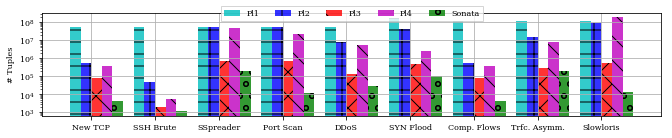

In [242]:
# data = {
#         #1: {2: 40072784.0, 3: 40072784.0, 4: 285222194.0, 6: 40072784.0}, 
#         2: {2: 572040.0, 3: 572040.0, 4: 479.0, 6: 155.0}, 
#         3: {2: 47937.0, 3: 4.0, 4: 3236.0, 6: 4.0}, 
#         #4: {2: 48367015.0, 3: 48367015.0, 4: 291354307.0, 6: 48367015.0}, 
#         5: {2: 56695698.0, 3: 56695698.0, 4: 5256073.0, 6: 1546758.0}, 
#         6: {2: 56695698.0, 3: 56695698.0, 4: 2652815.0, 6: 150.0}, 
#         7: {2: 7972178.0, 3: 274569.0, 4: 1103383.0000000005, 6: 695.0}
#        }

# data = {
#         2: {1: 56695698.0, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
#         3: {1: 56695698.0, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1032.0}, 
#         5: {1: 56695698.0, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
#         6: {1: 56695698.0, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2523.0}, 
#         7: {1: 56695698.0, 2: 7972178.0, 3: 128380.0, 4: 12208.0, 6: 12219.0}, 
#         9: {1: 3*56695698.0, 2: 41151274.0, 3: 508290.0, 4: 70517.0, 6: 57419.0}, 
#         10: {1: 2*56695698.0, 2: 572066.0, 3: 76757.0, 4: 3531.0, 6: 3531.0}, 
#         11: {1: 2*56695698.0, 2: 15944356.0, 3: 15944356.0, 4: 187920.0, 6: 186536.0}, 
#         12: {1: 2*56695698.0, 2: 96734030.0, 3: 49506082.0, 4: 9468.999999996158, 6: 9454.0}}

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 384181.0, 6: 4299.0}, 3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 5374.0, 6: 1108.0}, 5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 46327563.0, 6: 199307.0}, 6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 23005763.0, 6: 12719.0}, 7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 5472637.0, 6: 27630.0}, 9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 2679478.0, 6: 103617.0}, 10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 384319.0, 6: 4390.0}, 11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 7615165.0, 6: 186577.0}, 12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 187931945.0, 6: 42976.0}}
 
# Most realistic case
data = {
        2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
        3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1018.0}, 
        5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
        6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2823.0}, 
        7: {1: 56695698, 2: 7972178.0, 3: 274569.0, 4: 12208.0, 6: 12089.0}, 
        9: {1: 170087094, 2: 41151274.0, 3: 40655965.0, 4: 70517.0, 6: 56799.0}, 
        10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 3531.0, 6: 3531.0}, 
        11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 15961640.0, 6: 15944356.0}, 
        12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 9469.0, 6: 9454.0}
       }

"""
sigma_max = 12
width_max = 4
bits_max_stage = 8 * 1000000
bits_max_register = 4 * 1000000
ref_levels = [0, 4, 8, 12, 16, 20, 24, 28, 32]
"""

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 3459.0, 6: 3459.0}, 
        3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 1168.0, 6: 1018.0}, 
        5: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}, 
        6: {1: 56695698, 2: 56695698.0, 3: 1235586.0, 4: 2823.0, 6: 2823.0}, 
        7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 12208.0, 6: 12089.0}, 
        9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 70517.0, 6: 57419.0}, 
        10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 3531.0, 6: 3531.0000000000005}, 
        11: {1: 113391396, 2: 15944356.0, 3: 15944356.0, 4: 187920.0, 6: 186536.0}, 
        12: {1: 113391396, 2: 96734030.0, 3: 49506082.0, 4: 9469.0, 6: 9454.0}
       }

"""
sigma_max = 12
width_max = 4
bits_max_stage = 16 * 1000000
bits_max_register = 8 * 1000000
"""

data = {2: {1: 56695698, 2: 572040.0, 3: 76731.0, 4: 384181.0, 6: 4299.0}, 3: {1: 56695698, 2: 47937.0, 3: 1986.0, 4: 5374.0, 6: 1187.0}, 5: {1: 56695698, 2: 56695698.0, 3: 668491.0, 4: 46327563.0, 6: 199307.0}, 6: {1: 56695698, 2: 56695698.0, 3: 668491.0, 4: 23005763.0, 6: 12719.0}, 7: {1: 56695698, 2: 7972178.0, 3: 128380.0, 4: 5472637.0, 6: 27630.0}, 9: {1: 170087094, 2: 41151274.0, 3: 508290.0, 4: 2679478.0, 6: 103617.0}, 10: {1: 113391396, 2: 572066.0, 3: 76756.0, 4: 384319.0, 6: 4325.0}, 11: {1: 113391396, 2: 15944356.0, 3: 279288.0, 4: 7615165.0, 6: 186372.0}, 12: {1: 113391396, 2: 96734030.0, 3: 521674.0, 4: 187931945.0, 6: 13732.0}}
"""
sigma_max = 8
width_max = 1
bits_max_stage = 32 * 1000000
bits_max_register = 32 * 1000000
"""



apps = [2,3,5,6,7, 9, 10, 11, 12]
modes = [1,2,3,4,6]
modes_2_labels = {1:"Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'x', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

ids_2_labels = {1: "Dup Acks", 2:"New TCP", 3: "SSH Brute", 4: "HH", 
              5:"SSpreader", 6: "Port Scan", 7: "DDoS", 9: "SYN Flood", 
                10: "Comp. Flows", 11: "Trfc. Asymm.", 12: "Slowloris"}

#apps = range(1,8)
def get_plot_data(data_in):
    line_ids = data_in.keys()
    line_ids.sort()
    out = {}
    
    for line_id in line_ids:
        if line_id in apps:
            keys = data[line_id].keys()
            keys.sort()
            out[line_id] = []
            for k in keys:
                out[line_id].append(data_in[line_id][k])
    print out
            
    return out

def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    matplotlib.rcParams['figure.figsize']= [9.375, 1.93]
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = apps

    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[qid][ctr-1] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    #plt.xlabel('Applications')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, [ids_2_labels[qid] for qid in qids], rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/single_query_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data)
draw_plots(plot_data, modes, modes_2_labels)

## Multi query analysis

{1: {1: 56695698, 2: 56695698.0}, 2: {1: 226782792, 2: 97846972.0}, 3: {1: 226782792, 2: 105819150.0}, 4: {1: 283478490, 2: 202553180.0}, 5: {1: 396869886, 2: 259248878.0}, 6: {1: 453565584, 2: 259820918.0}, 7: {1: 566956980, 2: 260392984.0}, 8: {1: 680348376, 2: 260440921.0}}
[0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 3, 4, 5, 6, 7, 8] 8
[5.0, 20.0, 35.0, 50.0, 65.0, 80.0, 95.0, 110.0]
1 [5, 20, 35, 50, 65, 80, 95, 110] [56695698, 226782792, 226782792, 283478490, 396869886, 453565584, 566956980, 680348376]
2 [10, 25, 40, 55, 70, 85, 100, 115] [56695698.0, 97846972.0, 105819150.0, 202553180.0, 259248878.0, 259820918.0, 260392984.0, 260440921.0]
[5.0, 20.0, 35.0, 50.0, 65.0, 80.0, 95.0, 110.0] ['Pl1', 'Pl2']


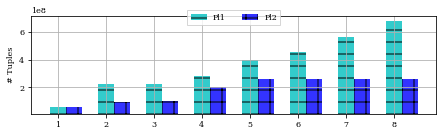

In [248]:

data = {1: {0: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}}, 
        2: {0: {1: 4*56695698, 2: 97846972.0, 3: 41974279.0, 4: 3533054.0, 6: 139045.0}}, 
        3: {0: {1: 4*56695698, 2: 105819150.0, 3: 42248848.0, 4: 10581402.0, 6: 435595.0}}, 
        4: {0: {1: 5*56695698, 2: 202553180.0, 3: 91754930.0, 4: 151872496.0, 6: 2568087.0}}, 
        5: {0: {1: 7*56695698, 2: 259248878.0, 3: 92990516.0, 4: 303297552.0, 6: 2592490.0}}, 
        6: {0: {1: 8*56695698, 2: 259820918.0, 3: 93067247.0, 4: 304094417.0, 6: 2620900.0}}, 
        7: {0: {1: 10*56695698, 2: 260392984.0, 3: 93144003.0, 4: 399496820.0, 6: 3039192.0}}, 
        8: {0: {1: 12*56695698, 2: 260440921.0, 3: 93145989.0, 4: 361048436.0, 6: 3281211.0}}
       }

modes = [1,2,3,4,6]
modes = [1,2]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
n_queries = data.keys()
n_queries.sort()

def get_plot_data(data, modes):
    x_labs = data.keys()
    x_labs.sort()
    
    out = {}
    for x_lab in x_labs:
        out[x_lab] = {}
        for mode in modes:
            out[x_lab][mode]= data[x_lab][0][mode]          
    return out




def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
#     matplotlib.rcParams['figure.figsize']= [9.375, 1.93]
    matplotlib.rcParams['figure.figsize']= [6.25, 1.93]
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = n_queries
    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[qid][mode] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
#     plt.xlabel('# Applications')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, n_queries, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
#     ax.set_yscale("log", nonposy='clip')
    ax.set_ylim(ymin=10000000)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/multi_query_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data, modes)
print plot_data
draw_plots(plot_data, modes, modes_2_labels)


{1: {3: 1318314.0, 4: 69561.0, 6: 69547.0}, 2: {3: 41974279.0, 4: 3533054.0, 6: 139045.0}, 3: {3: 42248848.0, 4: 10581402.0, 6: 435595.0}, 4: {3: 91754930.0, 4: 151872496.0, 6: 2568087.0}, 5: {3: 92990516.0, 4: 303297552.0, 6: 2592490.0}, 6: {3: 93067247.0, 4: 304094417.0, 6: 2620900.0}, 7: {3: 93144003.0, 4: 399496820.0, 6: 3039192.0}, 8: {3: 93145989.0, 4: 361048436.0, 6: 3281211.0}}
[0, 1, 2, 3, 4, 5, 6, 7] [1, 2, 3, 4, 5, 6, 7, 8] 8
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5, 147.5]
3 [5, 25, 45, 65, 85, 105, 125, 145] [1318314.0, 41974279.0, 42248848.0, 91754930.0, 92990516.0, 93067247.0, 93144003.0, 93145989.0]
4 [10, 30, 50, 70, 90, 110, 130, 150] [69561.0, 3533054.0, 10581402.0, 151872496.0, 303297552.0, 304094417.0, 399496820.0, 361048436.0]
6 [15, 35, 55, 75, 95, 115, 135, 155] [69547.0, 139045.0, 435595.0, 2568087.0, 2592490.0, 2620900.0, 3039192.0, 3281211.0]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5, 147.5] ['Pl3', 'Pl4', 'Sonata']


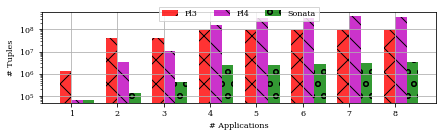

In [237]:
# Multi query analysis
data = {1: {0: {1: 56695698, 2: 56695698.0, 3: 1318314.0, 4: 69561.0, 6: 69547.0}}, 
        2: {0: {1: 4*56695698, 2: 97846972.0, 3: 41974279.0, 4: 3533054.0, 6: 139045.0}}, 
        3: {0: {1: 4*56695698, 2: 105819150.0, 3: 42248848.0, 4: 10581402.0, 6: 435595.0}}, 
        4: {0: {1: 5*56695698, 2: 202553180.0, 3: 91754930.0, 4: 151872496.0, 6: 2568087.0}}, 
        5: {0: {1: 7*56695698, 2: 259248878.0, 3: 92990516.0, 4: 303297552.0, 6: 2592490.0}}, 
        6: {0: {1: 8*56695698, 2: 259820918.0, 3: 93067247.0, 4: 304094417.0, 6: 2620900.0}}, 
        7: {0: {1: 10*56695698, 2: 260392984.0, 3: 93144003.0, 4: 399496820.0, 6: 3039192.0}}, 
        8: {0: {1: 12*56695698, 2: 260440921.0, 3: 93145989.0, 4: 361048436.0, 6: 3281211.0}}
       }

modes = [1,2,3,4,6]
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
n_queries = data.keys()
n_queries.sort()

def get_plot_data(data, modes):
    x_labs = data.keys()
    x_labs.sort()
    
    out = {}
    for x_lab in x_labs:
        out[x_lab] = {}
        for mode in modes:
            out[x_lab][mode]= data[x_lab][0][mode]          
    return out




def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
#     matplotlib.rcParams['figure.figsize']= [9.375, 1.93]
    matplotlib.rcParams['figure.figsize']= [6.25, 1.93]
    ctr = 1
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = n_queries
    xlab = range(len(qids))
    print xlab, qids, len(xlab)
    
    
    ticks = [shift*l+(0.5*float(bar_width*len(modes))) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[qid][mode] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    plt.xlabel('# Applications')
    plt.ylabel('# Tuples')
    
    print ticks, [modes_2_labels[mode] for mode in modes]
    plt.xticks(ticks, n_queries, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
    ax.set_ylim(ymin=50000)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/multi_query_analysis_log.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

plot_data = get_plot_data(data, modes)
print plot_data
draw_plots(plot_data, modes, modes_2_labels)


## Sensitivity: Pipeline Depth

[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5]
3 [0, 20, 40, 60, 80, 100, 120] [57267738.0, 57267738.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0]
4 [5, 25, 45, 65, 85, 105, 125] [346637238.0, 346637238.0, 125096772.0, 5232595.0, 1007807.0, 7803.0, 7803.0]
6 [10, 30, 50, 70, 90, 110, 130] [57267738.0, 57267738.0, 1029656.0, 4084.0, 4084.0, 4084.0, 4084.0]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5] [1, 2, 4, 8, 12, 16, 32]


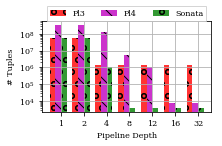

In [244]:
data = {1: {32: 2*56695698, 1: 2*56695698, 2: 2*56695698, 4: 2*56695698, 8: 2*56695698, 12: 2*56695698, 16: 2*56695698},
        2: {32: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {32: 1318391.0, 1: 57267738.0, 2: 57267738.0, 4: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {32: 7803.0, 1: 346637238.0, 2: 346637238.0, 4: 125096772.0, 8: 5232595.0, 12: 1007807.0, 16: 7803.0}, 
        6: {32: 4084.0, 1: 57267738.0, 2: 57267738.0, 4: 1029656.0, 8: 4084.0, 12: 4084.0, 16: 4084.0}}

Ds = [1,2,4,8,12,16,32]
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = [shift*l+(0.5*bar_width)*len(modes) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    plt.xlabel('Pipeline Depth')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_D_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

## Sensitivity: Pipeline Width

[0, 1, 2, 3, 4, 5, 6] [1, 2, 4, 8, 12, 16, 32]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5]
3 [0, 20, 40, 60, 80, 100, 120] [1318391.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0]
4 [5, 25, 45, 65, 85, 105, 125] [6783472.0, 1007807.0, 7803.0, 7803.0, 7803.0, 7803.0, 7803.0]
6 [10, 30, 50, 70, 90, 110, 130] [4084.0, 4084.0, 4084.0, 4084.0, 4084.0, 4084.0, 4084.0]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5] [1, 2, 4, 8, 12, 16, 32]


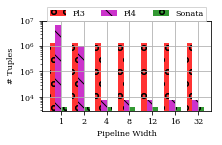

In [245]:
data = {1: {32: 113391396, 1: 113391396, 2: 113391396, 4: 113391396, 8: 113391396, 12: 113391396, 16: 113391396},
        2: {32: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {32: 1318391.0, 1: 1318391.0, 2: 1318391.0, 4: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {32: 7803.0, 1: 6783472.0, 2: 1007807.0, 4: 7803.0, 8: 7803.0, 12: 7803.0, 16: 7803.0}, 
        6: {32: 4084.0, 1: 4084.0, 2: 4084.0, 4: 4084.0, 8: 4084.0, 12: 4084.0, 16: 4084.0}}

Ds = [1,2,4,8,12,16,32]
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

def draw_plots(data, modes, modes_2_labels):
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = [shift*l+(0.5*bar_width)*len(modes) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    plt.xlabel('Pipeline Width')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_W_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)

## Sensitivity: Memory

[0, 1, 2, 3, 4, 5, 6, 7] [0.5, 1, 2, 4, 8, 12, 16, 32]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5, 147.5]
3 [0, 20, 40, 60, 80, 100, 120, 140] [57267738.0, 57267738.0, 57267738.0, 1890354.0, 1318391.0, 1318391.0, 1318391.0, 1318391.0]
4 [5, 25, 45, 65, 85, 105, 125, 145] [343375659.0, 302304168.0, 2406992.0, 1007807.0, 1007807.0, 1007806.0, 1007806.0, 1007806.0]
6 [10, 30, 50, 70, 90, 110, 130, 150] [56695952.0, 56695945.0, 1546913.0, 6140.0, 4084.0, 2985.0, 2216.0, 1881.0]
[7.5, 27.5, 47.5, 67.5, 87.5, 107.5, 127.5, 147.5] [0.5, 1, 2, 4, 8, 12, 16, 32]


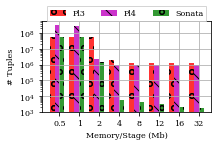

In [246]:
data = {1: {0.5: 113391396, 1: 113391396, 2: 113391396, 4: 113391396, 32: 113391396, 8: 113391396, 12: 113391396, 16: 113391396}, 
        2: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 57267738.0, 32: 57267738.0, 8: 57267738.0, 12: 57267738.0, 16: 57267738.0}, 
        3: {0.5: 57267738.0, 1: 57267738.0, 2: 57267738.0, 4: 1890354.0, 32: 1318391.0, 8: 1318391.0, 12: 1318391.0, 16: 1318391.0}, 
        4: {0.5: 343375659.0, 1: 302304168.0, 2: 2406992.0, 4: 1007807.0, 32: 1007806.0, 8: 1007807.0, 12: 1007806.0, 16: 1007806.0}, 
        6: {0.5: 56695952.0, 1: 56695945.0, 2: 1546913.0, 4: 6140.0, 32: 1881.0, 8: 4084.0, 12: 2985.0, 16: 2216.0}
       }

Ds = data[6].keys()
Ds.sort()
modes = [3,4,6]
modes_2_labels = {1: "Pl1", 2: "Pl2", 3: "Pl3", 4: "Pl4", 6: "Sonata"}
hatches = {0:'/', 1:'-', 2:'+', 3:'o', 4:'\\', 5:'x', 6:'o', 7:'O', 8:'.'}

def draw_plots(data, modes, modes_2_labels):
    f, (ax) = plt.subplots(1)
    ctr = 0
    bar_width = 5
    shift = (1+len(modes))*bar_width
    qids = Ds
    qids.sort()
    matplotlib.rcParams['figure.figsize']= [3.125, 1.93]

    xlab = range(len(qids))
    print xlab, qids
    
    ticks = [shift*l+(0.5*bar_width)*len(modes) for l in xlab]
    print ticks
    
    for mode in modes:
        y = [data[mode][qid] for qid in qids]
        
        x = [l*shift+ctr*bar_width for l in xlab]
        
        print mode, x, y
        ax.bar(x, y, bar_width, alpha=0.8, color=color_n[mode], hatch = hatches[mode],label=modes_2_labels[mode])
        
        ctr += 1
   
    plt.xlabel('Memory/Stage (Mb)')
    plt.ylabel('# Tuples')
    
    print ticks, qids
    plt.xticks(ticks, qids, rotation=0)
    ax.grid(True)
    #ax.set_xlim(xmax=5.25)
    ax.set_yscale("log", nonposy='clip')
#     ax.set_xlim(xmin=0.75)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
              ncol=5, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/sensitivity_B_analysis.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

# plot_data = get_plot_data(data)
draw_plots(data, modes, modes_2_labels)